In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import warnings
import os
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('2023CarDataset.csv')

In [5]:
df.head()
#В данной работе датасет представляет собой информацию о автомобилях 2022-2023 года выпуска.
#Car Make - Марка автомобиля
#Car Model - Модель
#Year - Год выпуска
#Body Type - Тип кузова
#Color Options -Цвета доступные к покупке
#Fuel Type - Тип топлива
#Engine Size (L) - Объем двигателя
#Horsepower - Лошадиные силы
#Torque (Nm) - Крутящий момент
#Transmission Type - Тип трансмиссии
#Acceleration (0-60 mph) - Разгон 0-60 миль/
#Top Speed (mph) - Максимальная скорость	
#Mileage (MPG) - Пробег
#Safety Features - Система безопасности
#Entertainment Features - Развлекательные функции
#Interior Features - Внутренние дополнения
#Exterior Features - Внешнии дополнения
#Price - Цена
#Customer Ratings - Оценка покупателоей (до 5)
#Sales Figures (Units Sold) - Кол-во проданых единиц

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...","28,500",4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...","45,900",4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...","22,950",4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...","53,250",4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283 (est.),440 (est.),Automatic,5.2 seconds,140 (est.),125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...","49,990",4.9/5,"4,500"


In [6]:
#Для удобства верстки изменяем начальные названия столбцов, отступы, табуляции, символы.

column_name_changes = {
    ' Price ($) ': 'Price',
    ' Exterior Features                                           ': 'Exterior Features',
    ' Interior Features                                ': 'Interior Features',
    ' Car Make ': 'Car Make',
    ' Car Model   ': 'Car Model',
    ' Year ': 'Year',
    ' Body Type ': 'Body Type',
    ' Color Options                 ': 'Color Options',
    ' Fuel Type ': 'Fuel Type',
    ' Engine Size (L) ': 'Engine Size(L)',
    ' Horsepower ' : 'Horsepower',
    ' Torque (Nm) ' : 'Torque (Nm)',
    ' Transmission Type ': 'Transmission Type',
    ' Acceleration (0-60 mph) ': 'Acceleration (0-60 mph)',
    ' Top Speed (mph) ': 'Top Speed (mph)',
    ' Mileage (MPG) ': 'Mileage (MPG)',
    ' Safety Features                                      ': 'Safety Features',
    ' Entertainment Features               ': 'Entertainment Features',
    ' Customer Ratings ': 'Customer Ratings',
    ' Sales Figures (Units Sold) ': 'Sales Figures (Units Sold)'

}

df.rename(columns=column_name_changes, inplace=True)

df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Sales Figures (Units Sold)'] = df['Sales Figures (Units Sold)'].str.replace(',', '').astype(float)
df['Customer Ratings'] = df['Customer Ratings'].str.split('/').str[0]
df['Acceleration (0-60 mph)'] = df['Acceleration (0-60 mph)'].str.replace(' seconds', '').astype(float)
df['Horsepower'] = df['Horsepower'].str.split('(').str[0]
df['Torque (Nm)'] = df['Torque (Nm)'].str.split('(').str[0]
df['Top Speed (mph)'] = df['Top Speed (mph)'].str.split('(').str[0]
df['Mileage (MPG)'] = df['Mileage (MPG)'].str.split('(').str[0]

In [7]:
#Убираем табуляции из значений ячеек.
df = df.replace(r'\s+','',regex=True)

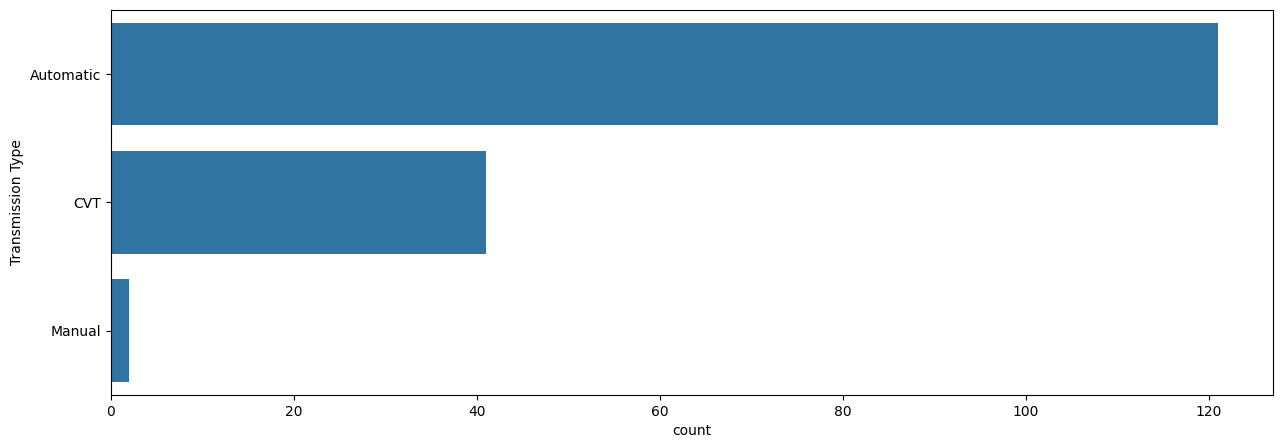

In [8]:
#Гистограмма количества типов проданных коробок переключения передач.
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Transmission Type' , data = df)
plt.show()

#Анализируя гистограмму можно сделать вывод о том, что классические КПП выходят с рынка автомобилей.
#Гражданские автомобили все меньше оснащаются МКПП, в угоду добства потребителя.

C:\Users\bylookjr\AppData\Local\Temp\ipykernel_18904\4208683500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'] , bins = 20)


<Axes: xlabel='Price', ylabel='Density'>

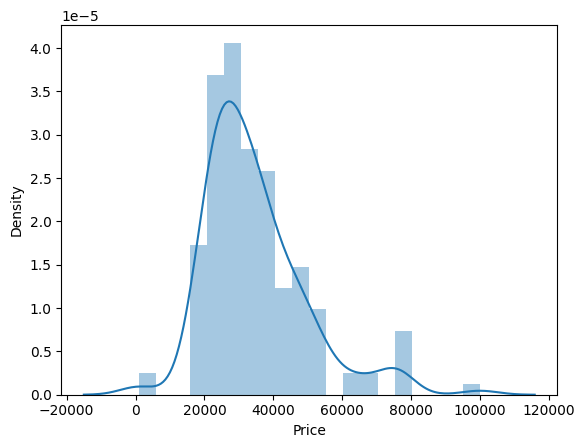

In [9]:
sns.distplot(df['Price'] , bins = 20)
#По гистограмме можно заметить практически нормальное распределение(по графику можно наблюдать отрицательную симметрию,
#так как левый хвост, меньше правого)цен на автомобили.

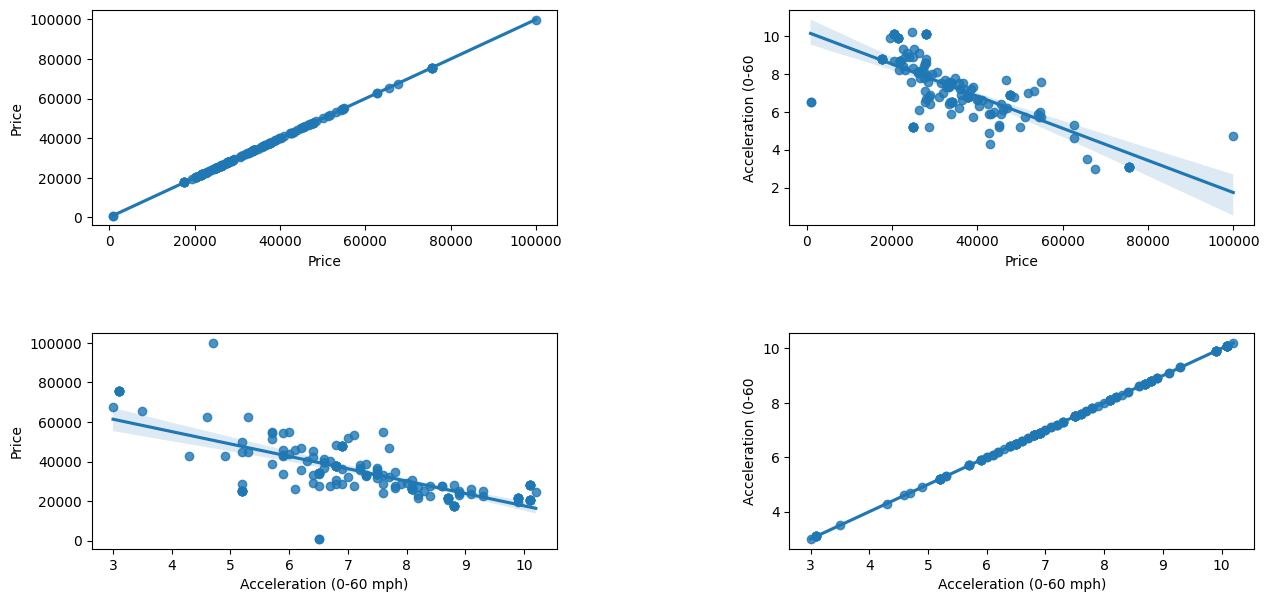

In [10]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Price', 'Acceleration (0-60 mph)']:
    for y in ['Price', 'Acceleration (0-60 mph)']:
        n += 1
        plt.subplot(2 ,2 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()
#Рассматривая графики зависимости Цены от Ускорения(0-60 миль/ч) и Ускорения(0-60 миль/ч) от цены.
#Можно сделать вывод, что чем дороже автомобиль, тем лучше у него динамика ускорения.
#В этих графиках могут быть "выбросы", так как автомобиль может стоить дорого и разгоняться медленно( и наоборот).
#Пример 1: автомобиль преимум сегмента с шумоизоляцией, множеством функций и тд. Хоть объем двигателя, будет большой,
#это не значит что ускорение будет быстрым)
#Пример 2: гражданский автомобиль комплектации "предгоночной" он может стоить относительно недорого, но иметь высокую динамику.

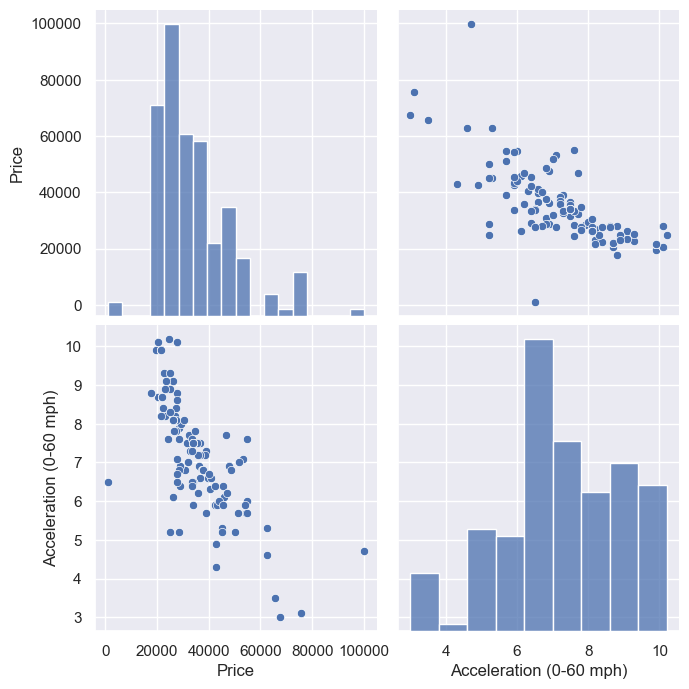

In [11]:
sns.set()
cols = ['Price', 'Acceleration (0-60 mph)']
sns.pairplot(df[cols], height = 3.5)
plt.show();
#Аналогия к предыдущему пункту.

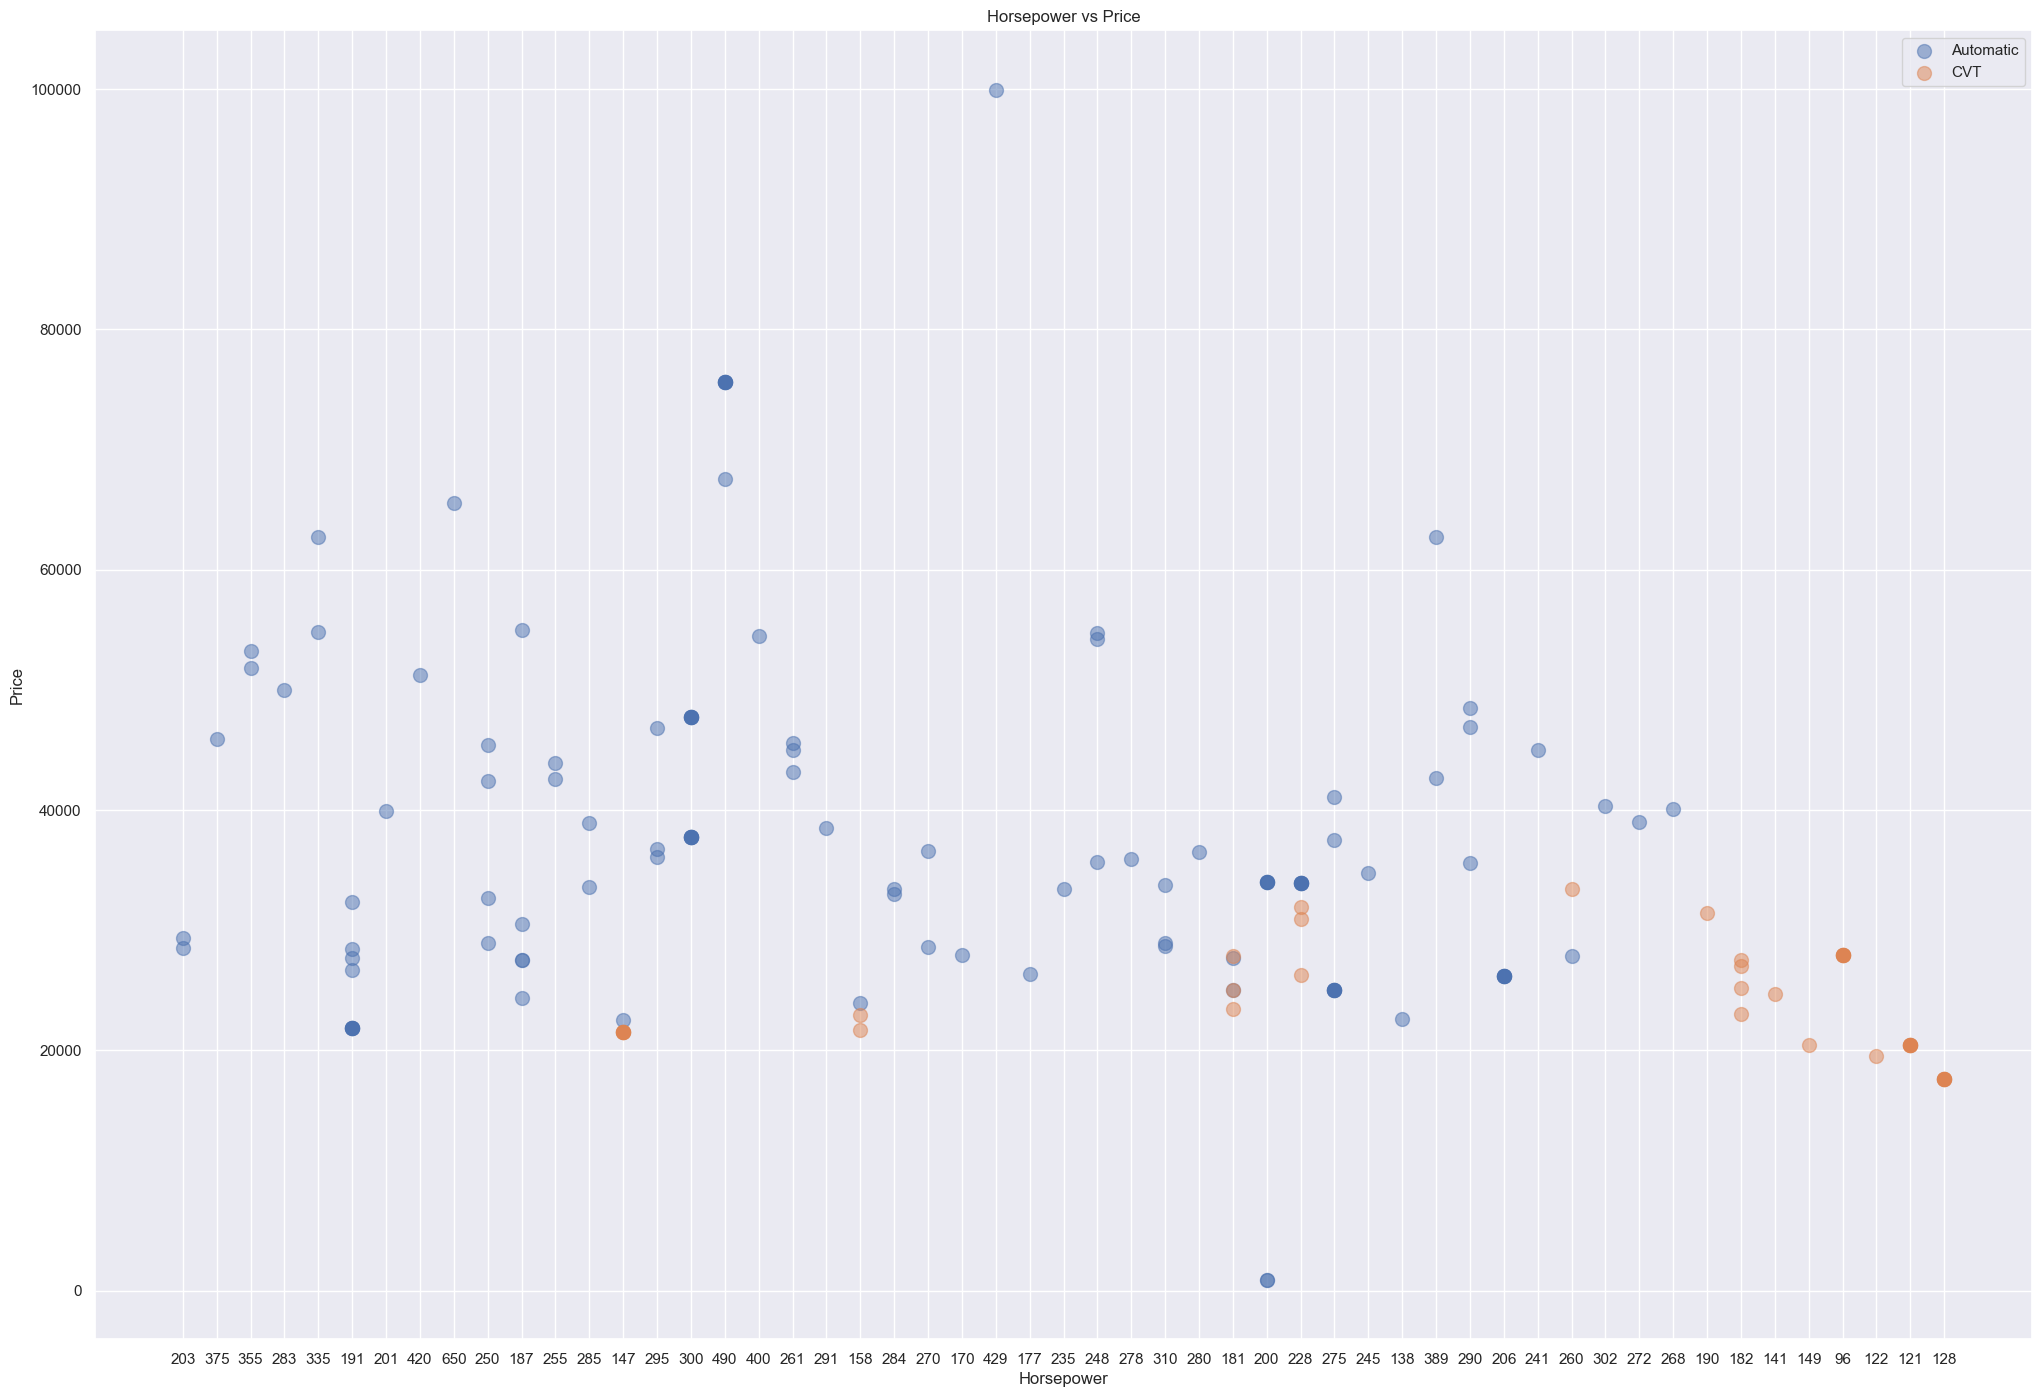

In [12]:
plt.figure(1 , figsize = (25 , 17))
for type in ['Automatic' , 'CVT']:
    plt.scatter(x = 'Horsepower' , y = 'Price' , data = df[df['Transmission Type'] == type] ,
                s = 100 , alpha = 0.5 , label = type)
plt.xlabel('Horsepower'), plt.ylabel('Price') 
plt.title('Horsepower vs Price')
plt.legend()
plt.show()
#Здесь предоставлена визуализация "Мощности автомобиля(л.с.) относительно цены". В кружками отмечены типы КПП(механическая КПП не расматривается).
#Можно заметить, что автомобили с автомотическими КПП дороже в стоимости и имеют большую мощность, в отличии от автомобилей
#оснащенных вариатором(CVT). Автоматическая КПП дороже в производстве,нежели вариатор( стоит отметить, что при должном обслуживании АКПП надежнее 
#и удобнее)

C:\Users\bylookjr\AppData\Local\Temp\ipykernel_18904\1157178775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Transmission Type' , data = df , palette = 'vlag')


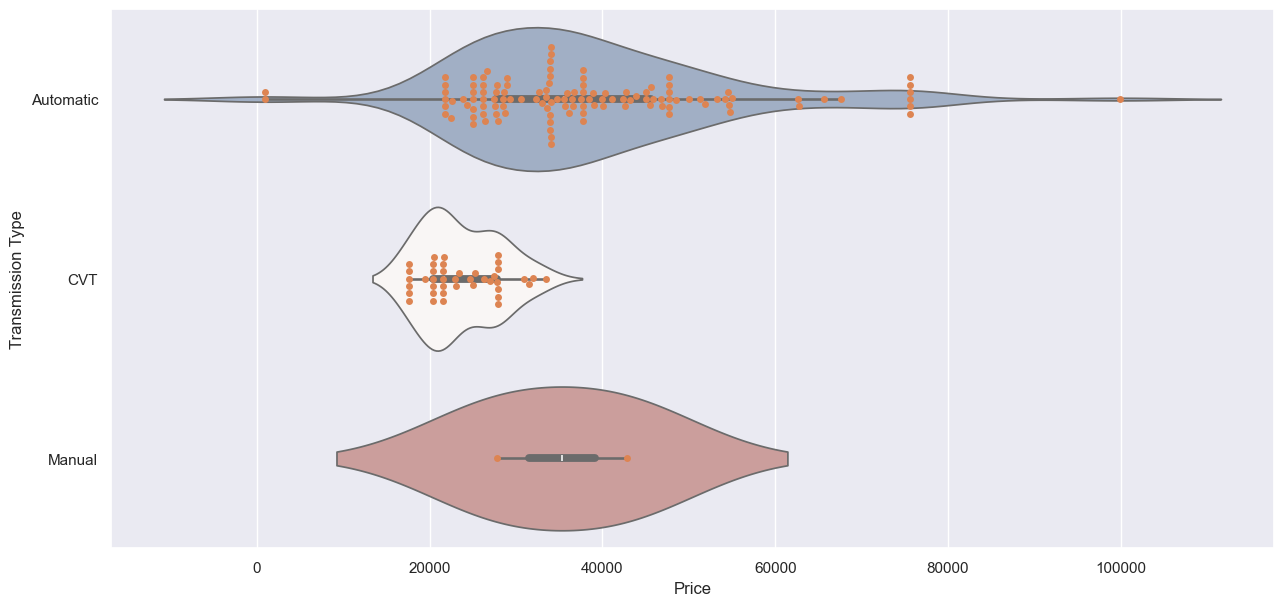

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in [ 'Price' ]:
    n += 1 
    plt.subplot(1 , 1 , n)
    plt.subplots_adjust(hspace = 0.1 , wspace = 0.1)
    sns.violinplot(x = cols , y = 'Transmission Type' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Transmission Type' , data = df)
    plt.ylabel('Transmission Type' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()
#Распределение значений цены в отношении типов трансмиссии.

In [14]:
df = df[df['Engine Size(L)'] != 'N/A' ]
df['Engine Size(L)'] = pd.to_numeric(df['Engine Size(L)'])

df = df[df['Horsepower'] != 'N/A' ]
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

df = df[df['Torque (Nm)'] != 'N/A' ]
df['Torque (Nm)'] = pd.to_numeric(df['Torque (Nm)'])

df = df[df['Top Speed (mph)'] != 'N/A' ]
df['Top Speed (mph)'] = pd.to_numeric(df['Top Speed (mph)'])

df = df[df['Mileage (MPG)'] != 'N/A' ]
df['Mileage (MPG)'] = pd.to_numeric(df['Mileage (MPG)'])

In [15]:
X1 = df[['Horsepower' , 'Engine Size(L)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


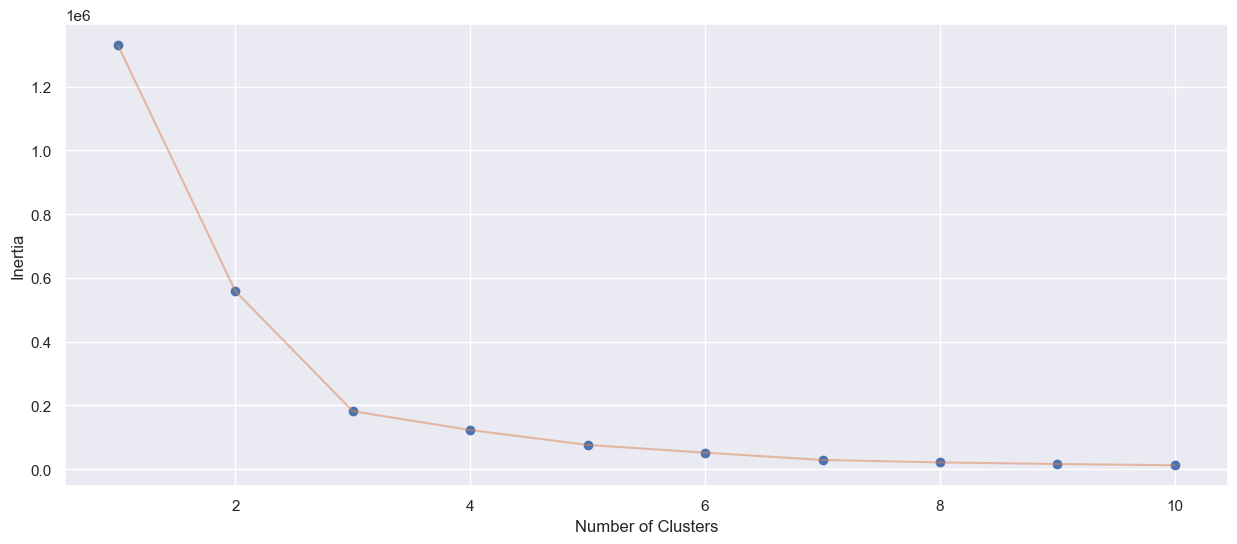

In [16]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

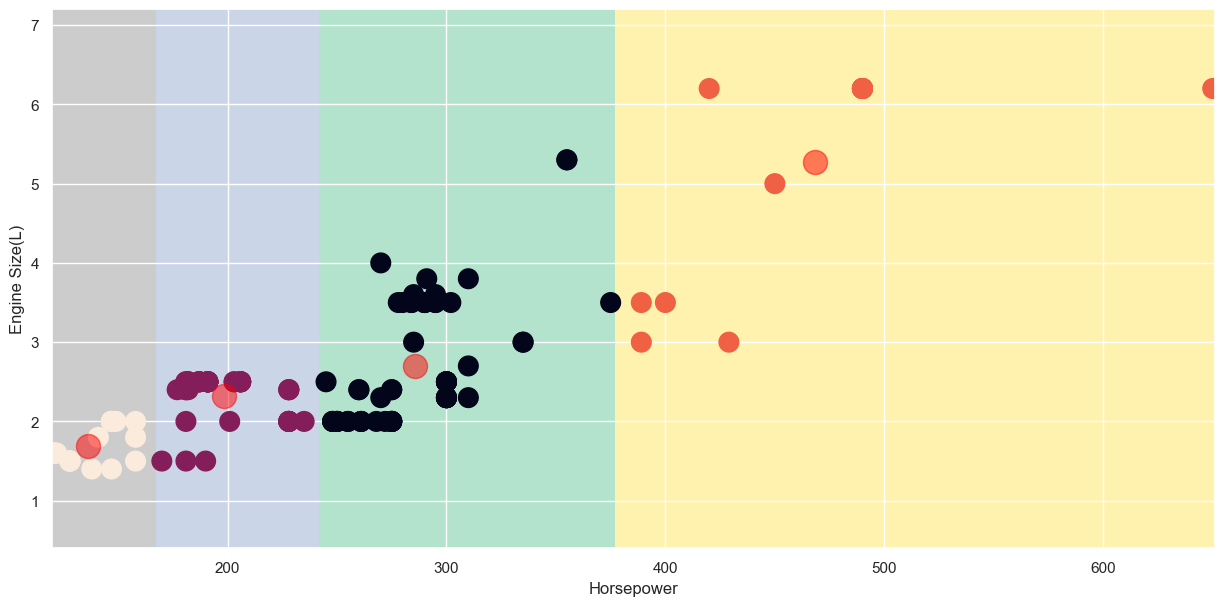

In [39]:
#Рассмотрим кластеризацию используя объем двигателя и мощнность автомобиля(л.с)
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Horsepower' ,y = 'Engine Size(L)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Engine Size(L)') , plt.xlabel('Horsepower')
plt.show()

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



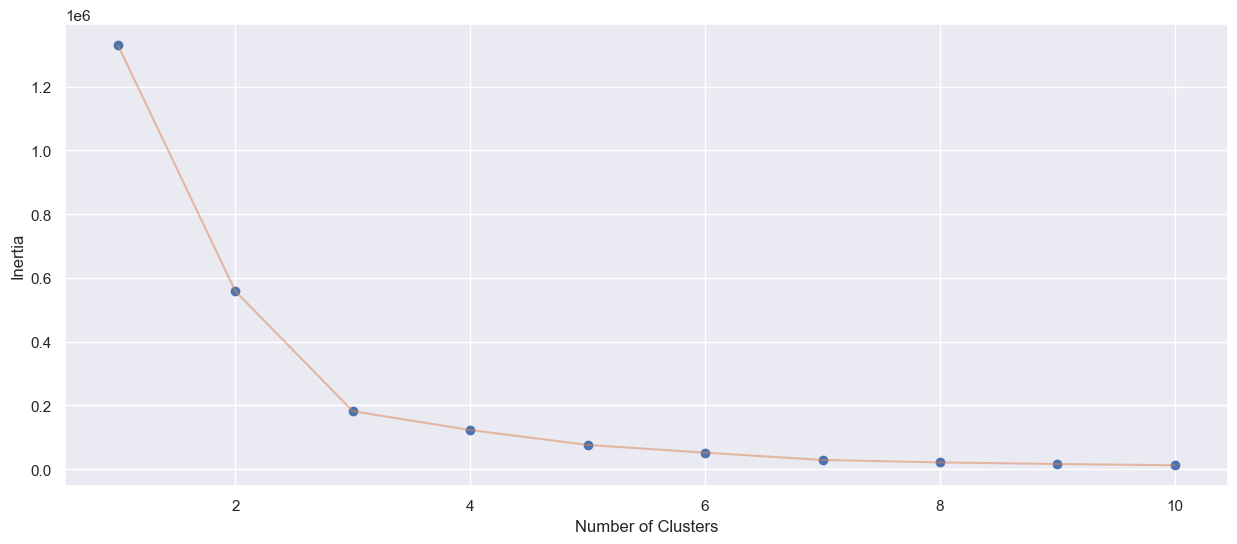

In [40]:
X2 = df[['Horsepower' , 'Engine Size(L)','Torque (Nm)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

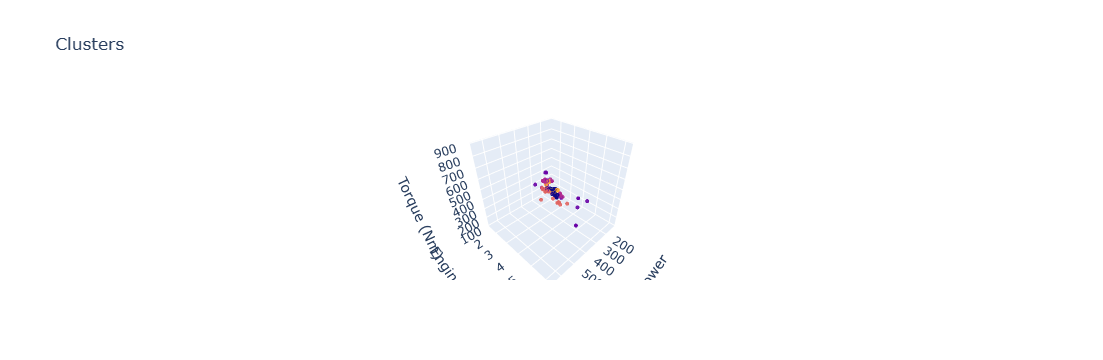

In [41]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Horsepower'],
    y= df['Engine Size(L)'],
    z= df['Torque (Nm)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 2,
        line=dict(
            color= df['label3'],
            width= 20
        ),
        opacity=0.9
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Horsepower'),
            yaxis = dict(title  = 'Engine Size(L)'),
            zaxis = dict(title  = 'Torque (Nm)')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
#Трехмерное изображение зависимости Мощности(л.с.), объема двигателя(л), крутящего момента(Н*м).

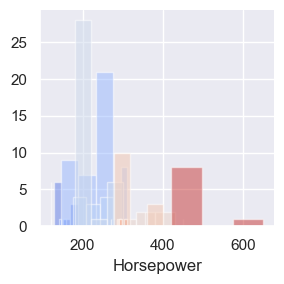

In [54]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Engine Size(L)",palette='coolwarm')
g = g.map(plt.hist,'Horsepower',bins=3,alpha=0.5)

In [55]:
# Находим автомобили по критерию: Объем двигателя больше трех литров
df[df['Engine Size(L)'] > 3.0]

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size(L),Horsepower,Torque (Nm),Transmission Type,...,Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price,Customer Ratings,Sales Figures (Units Sold),label3
1,Ford,F-150,2023,Truck,"Blue,Red,Gray",Gasoline,3.5,375,475,Automatic,...,145,23,"ABS,Airbags,TrailerSwayControl,RearViewCamera",12-inchSYNC4InfotainmentSystem,"ClothSeats,PowerWindows,KeylessEntry","LEDTaillights,TowHitch,BedLiner",45900.0,4.8,2200.0,1
3,Chevrolet,Tahoe,2023,SUV,"Red,White,Gray",Gasoline,5.3,355,519,Automatic,...,130,19,"ABS,Airbags,ForwardCollisionWarning,LaneKeepAs...",10.2-inchInfotainmentSystem,"LeatherSeats,HeatedFrontSeats,Third-RowSeating","LEDHeadlights,RoofRails,PowerLiftgate",53250.0,4.7,1000.0,1
8,Ford,Mustang,2023,Coupe,"Yellow,Black,Red",Gasoline,5.0,450,570,Manual,...,180,19,"ABS,Airbags,TractionControl,ElectronicStabilit...",12-inchSYNC4InfotainmentSystem,"LeatherSeats,PowerDriver'sSeat,AmbientLighting","LEDHeadlights,RearSpoiler,DualExhaust",42850.0,4.9,1800.0,1
11,GMC,Sierra,2023,Truck,"Red,Black,White",Gasoline,6.2,420,624,Automatic,...,140,17,"ABS,Airbags,TrailerBrakeControl,RearViewCamera",12.3-inchInfotainmentSystem,"LeatherSeats,HeatedFrontSeats,PowerTailgate","LEDTaillights,TowHitch,20-inchAlloyWheels",51250.0,4.7,1000.0,1
14,Chevrolet,Camaro,2023,Coupe,"Red,Black,Yellow",Gasoline,6.2,650,881,Automatic,...,190,17,"ABS,Airbags,TractionControl,StabiliTrak",9-inchInfotainmentSystem,"LeatherSeats,HeatedandVentilatedFrontSeats","LEDHeadlights,RearSpoiler,20-inchAlloyWheels",65590.0,4.9,1000.0,5
19,Jeep,Wrangler,2023,SUV,"Gray,Green,Red",Gasoline,3.6,285,353,Automatic,...,125,20,"ABS,Airbags,HillStartAssist,ElectronicRollMiti...",8.4-inchUconnectInfotainment,"ClothSeats,KeylessEntry,RemovableTop","LEDHeadlights,TowHooks,17-inchAlloyWheels",38950.0,4.7,1800.0,2
23,Toyota,Highlander,2023,SUV,"White,Silver,Black",Gasoline,3.5,295,356,Automatic,...,115,25,"ABS,Airbags,LaneDepartureWarning,BlindSpotMoni...",8-inchTouchscreenDisplay,"ClothSeats,PowerWindows,KeylessEntry","LEDHeadlights,RoofRails,18-inchAlloyWheels",36085.0,4.7,1900.0,2
25,Chevrolet,Corvette,2023,Coupe,"Red,Black,White",Gasoline,6.2,490,630,Automatic,...,190,20,"ABS,Airbags,PerformanceTractionManagement,Rear...",10.2-inchInfotainmentSystem,"LeatherSeats,PowerDriver'sSeat,BosePremiumAudio","LEDHeadlights,RearSpoiler,19-inchAlloyWheels",67590.0,4.9,1300.0,1
26,Ford,Expedition,2023,SUV,"Blue,White,Silver",Gasoline,3.5,400,650,Automatic,...,120,22,"ABS,Airbags,BlindSpotInformationSystem,RearCro...",12.3-inchSYNC4InfotainmentSystem,"LeatherSeats,HeatedFrontSeats,PowerFoldThird-R...","LEDHeadlights,RoofRails,22-inchAlloyWheels",54500.0,4.8,800.0,1
28,GMC,Yukon,2023,SUV,"Black,White,Gray",Gasoline,5.3,355,519,Automatic,...,120,20,"ABS,Airbags,LaneKeepAssist,BlindZoneAlert",10.2-inchInfotainmentDisplay,"LeatherSeats,HeatedFrontSeats,PowerTailgate","LEDHeadlights,RoofRails,20-inchAlloyWheels",51850.0,4.7,1200.0,1


C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of

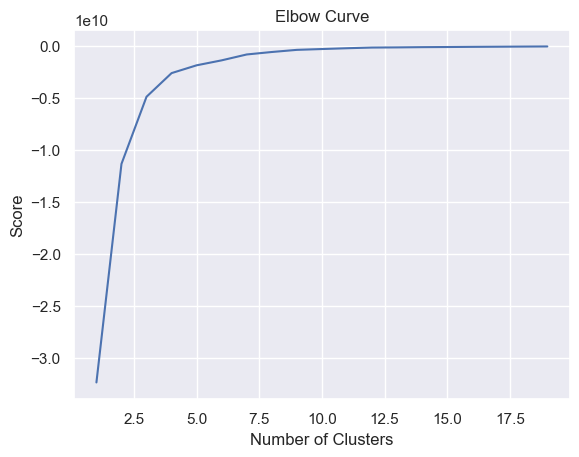

In [56]:
new_df = df[['Year','Engine Size(L)','Horsepower','Torque (Nm)','Top Speed (mph)','Mileage (MPG)','Acceleration (0-60 mph)','Price','Sales Figures (Units Sold)']]
new_df.describe()

from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(new_df.drop('Year',axis=1))
df_numeric_scaled = pd.DataFrame(minmax_processed, index=new_df.index, columns=new_df.columns[:-1])
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(new_df).score(new_df) for i in range(len(kmeans))]


plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(new_df)

len(kmeans.labels_)
new_df['cluster'] = kmeans.labels_
new_df.groupby(['cluster']).mean()
#Кластерезация очень помогает в работе с таргетированием рекламы.
#Рассмотрим такую ситуацию: Мы хотим начать рекламную кампанию нового моторного масла для автомобилей литражем 2,0-2,5 литров.
#Для этого мы создаем базу автомобилей с помощью кластеров 0 и 2.

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\bylookjr\AppData\Local\Temp\ipykernel_18904\735403653.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Engine Size(L),Horsepower,Torque (Nm),Top Speed (mph),Mileage (MPG),Acceleration (0-60 mph),Price,Sales Figures (Units Sold)
cluster,,,,,,,,,
0,2023.000000,2.592683,262.682927,339.926829,126.463415,25.219512,7.026829,35648.170732,1707.317073
1,2023.000000,3.000000,429.000000,520.000000,155.000000,23.000000,4.700000,99950.000000,400.000000
2,2023.000000,3.011111,304.814815,372.481481,131.296296,24.592593,6.288889,48057.407407,1382.962963
3,2022.985714,2.120000,184.400000,197.714286,125.642857,31.928571,8.275714,23942.500000,1945.714286
4,2022.900000,5.560000,480.400000,511.100000,183.000000,21.000000,3.500000,71211.500000,1140.000000


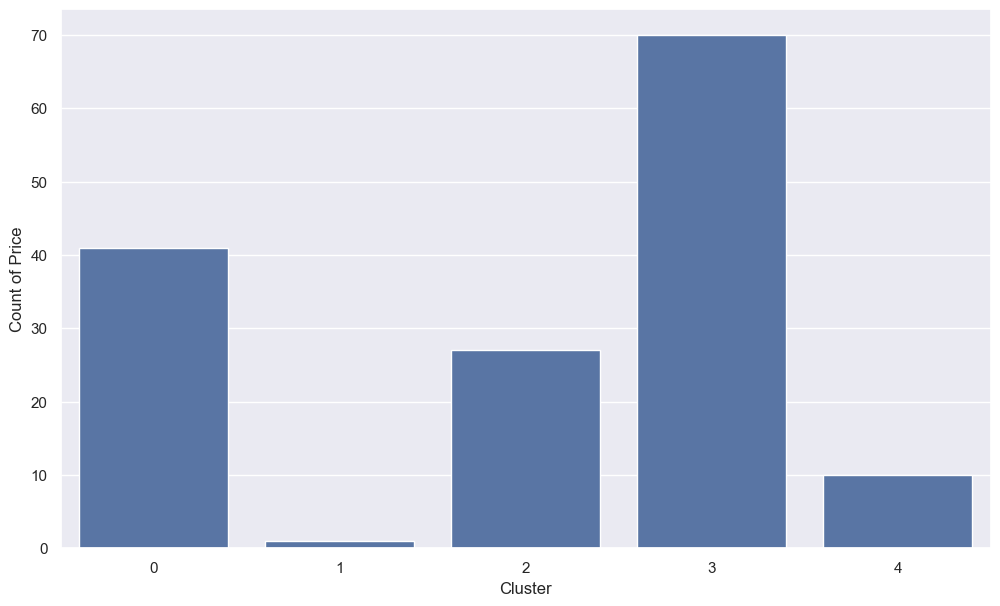

In [58]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=new_df.groupby(['cluster']).count()['Price'].values)
x=axis.set_xlabel("Cluster")
x=axis.set_ylabel("Count of Price")

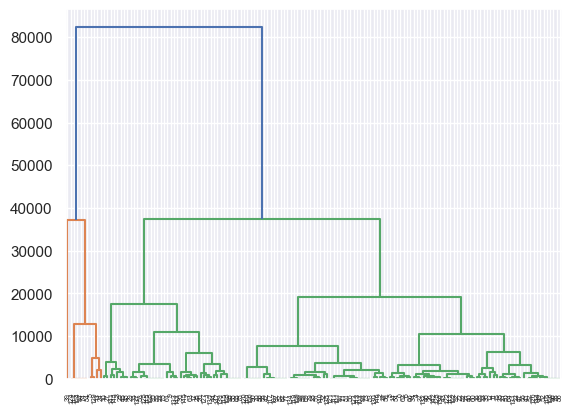

In [59]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Complete linkage

mergings = linkage(new_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

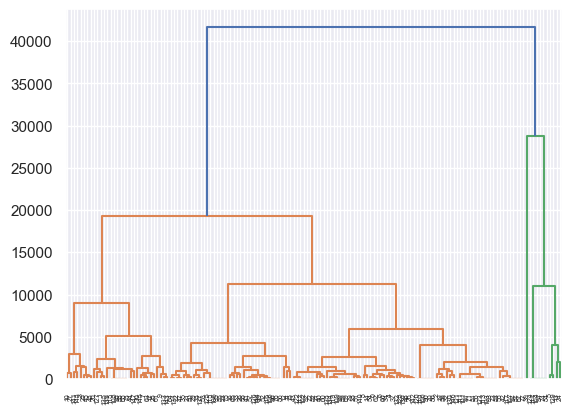

In [60]:
# Average linkage

mergings = linkage(new_df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
#Вывод: Благодаря работе с кластерами возможно распределение элементов для признаков. Группировка элементов очень помагает 
#в таргетировании поставленных целей и, в следствии, экономии ресурсов затраченных на работу.